In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import ydata_profiling as pp

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import datetime as dt

In [2]:
df = pd.read_csv('data/cellphones data.csv', parse_dates=['release date'])
ratings_df = pd.read_csv('data/cellphones ratings.csv')
users_df = pd.read_csv('data/cellphones users.csv')

C:\Users\Oleh\AppData\Local\Temp\ipykernel_18192\1640860314.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('data/cellphones data.csv', parse_dates=['release date'])


In [3]:
for i in [df, ratings_df, users_df]:
    display(i.head(5))

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,2022-03-18
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,2021-09-24
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,2021-09-24
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24


,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


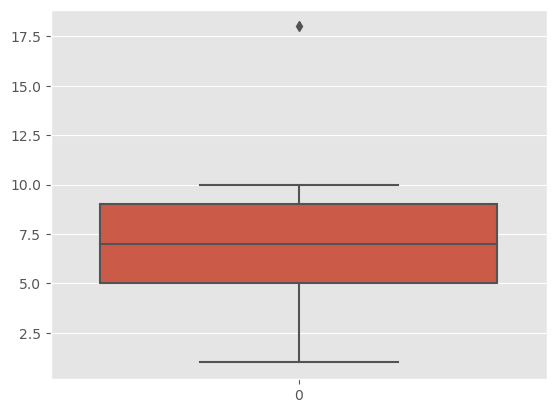

In [4]:
sns.boxplot(ratings_df['rating'])
plt.show()

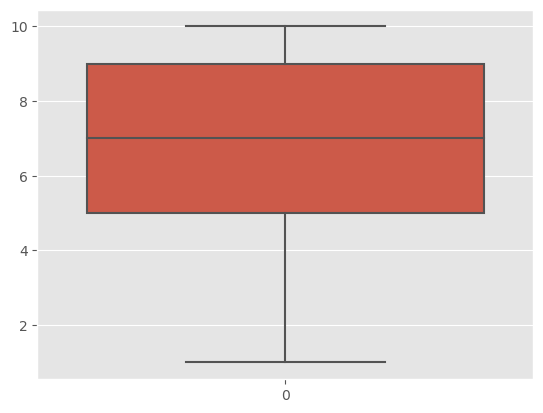

In [5]:
#errors handling in rating

avg_range_rating = (10+0)/2

ratings_df['rating'] = ratings_df['rating'].apply(lambda x: avg_range_rating if x >10 or x <0 else x)

sns.boxplot(ratings_df['rating'])

avg_ratings = ratings_df.groupby('cellphone_id').agg({'rating':'mean', 'user_id':'size'}).reset_index()

df['release date'] = df['release date'].dt.year

In [6]:
df_merged = pd.merge(df, avg_ratings, on='cellphone_id', how='left').drop_duplicates()

display(df_merged.info())

print(df_merged.cellphone_id.nunique())

df_merged = df_merged.drop(columns=['cellphone_id'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     int64  
 14  rating            33 non-null     float64
 15  user_id           33 non-null     int64  
dtypes: float64(3), int64(10), object(3)
memory usa

None

33


In [7]:
df_merged

,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,rating,user_id
0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,2022,7.500000,20
1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,2021,7.750000,24
2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021,8.000000,27
3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,2021,8.000000,29
4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021,7.647059,34
5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,2018,7.000000,31
6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,2021,6.066667,30
7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,2022,6.551724,29
8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,2021,6.205128,39
9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,2022,7.103448,29


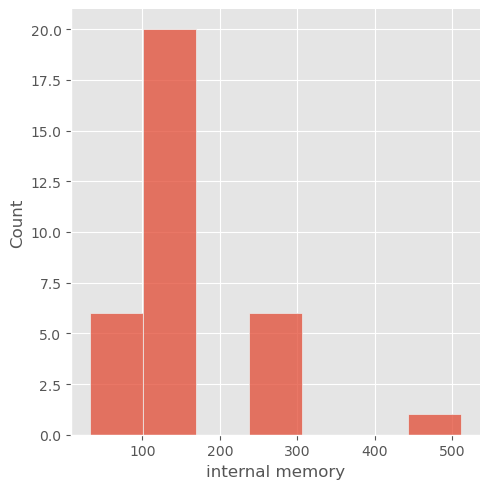

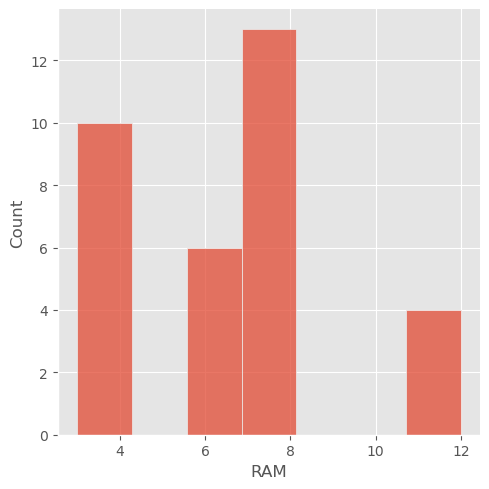

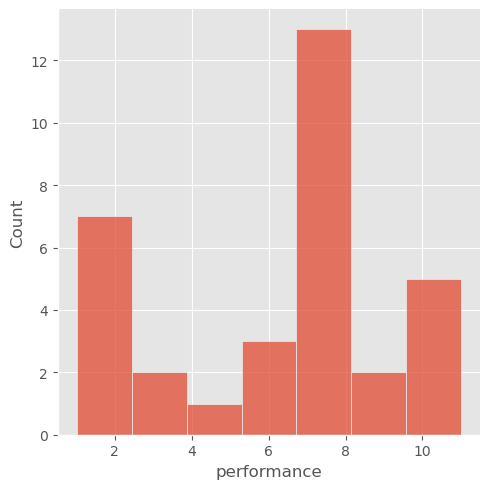

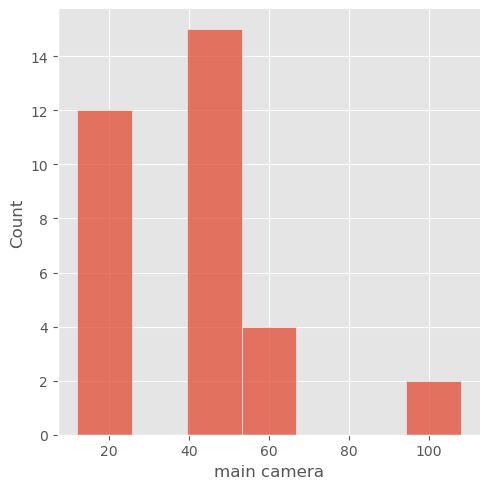

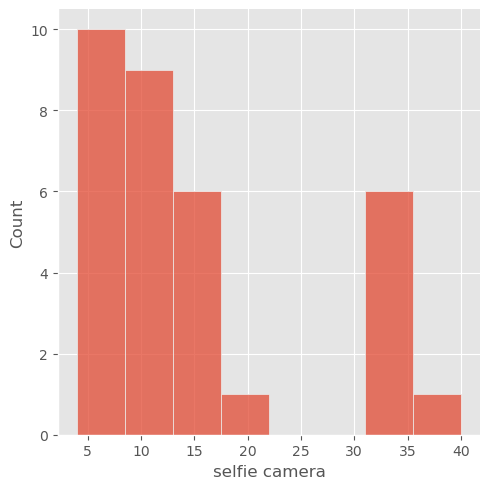

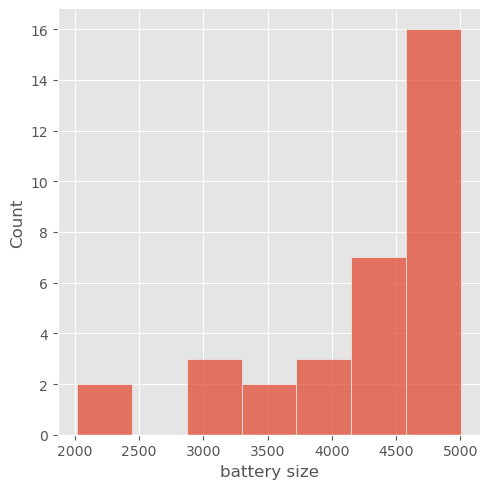

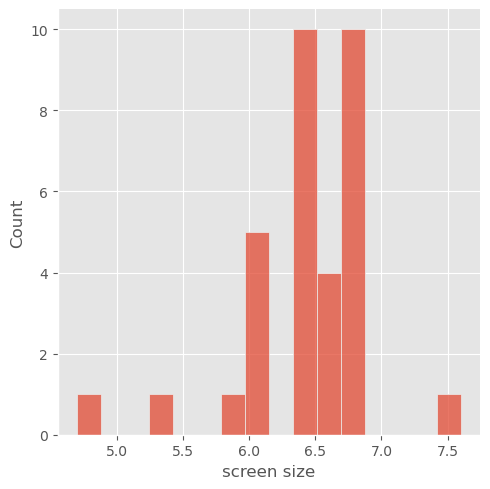

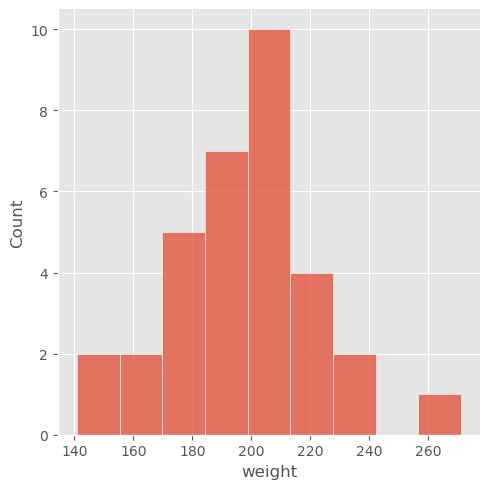

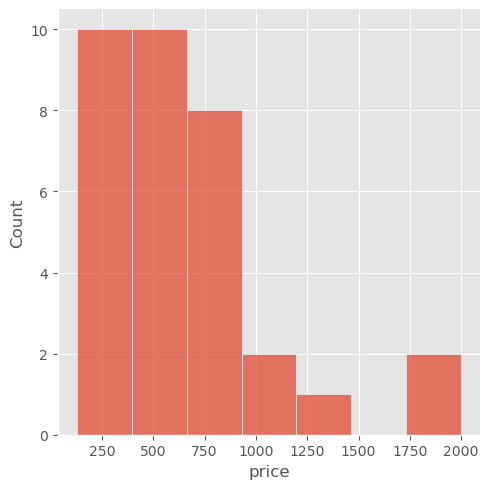

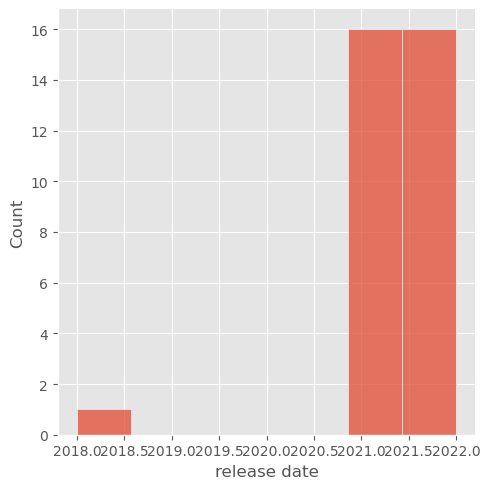

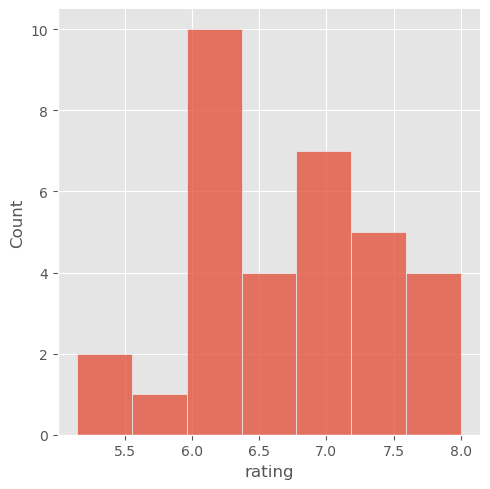

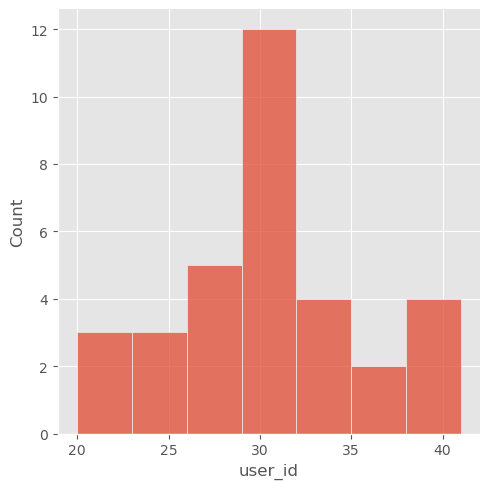

In [8]:
numeric_cols = df_merged.select_dtypes(include=['number']).columns

for col in numeric_cols:
    sns.displot(df_merged[col])
    plt.show()

In [9]:
# data transformation

def split__train_test(df):
    sub_df = df.copy()
    sub_df['operating system'] = np.where(sub_df['operating system']=="iOS", 1, 0)
    sub_df = pd.merge(pd.get_dummies(sub_df['brand']), sub_df.drop(columns=['brand']), left_index=True, right_index=True)
    vect = TfidfVectorizer(stop_words='english', max_features=5).fit(df_merged['model']) # 5 most important words from the model description
    sub_df = pd.merge(sub_df, pd.DataFrame(vect.transform(df_merged['model']).toarray(), columns=vect.get_feature_names_out()), left_index=True, right_index=True)
    sub_df = sub_df.set_index('model')
    return sub_df

sub_df = split__train_test(df_merged)

print(sub_df.shape)

(33, 28)


In [10]:
cosine_similarity_array = cosine_similarity(sub_df)

cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=sub_df.index, columns=sub_df.index)

In [11]:
#similarity for iPhone SE (2022)

cosine_similarity_series = cosine_similarity_df.loc['iPhone SE (2022)'].sort_values(ascending=False)[1:]

cosine_similarity_series[:10]

model
iPhone 13 Mini       0.993385
iPhone XR            0.979409
iPhone 13            0.974187
iPhone 13 Pro        0.973417
Galaxy Z Flip 3      0.969999
Galaxy S22           0.959733
Zenfone 8            0.950472
Moto G Pure          0.942501
iPhone 13 Pro Max    0.936981
Pixel 6a             0.936372
Name: iPhone SE (2022), dtype: float64

In [12]:
# similarity to users

liked_phones = ratings_df[ratings_df['rating']>=8]

user_preferences = pd.merge(liked_phones, df, on='cellphone_id')[['user_id', 'model']].drop_duplicates()

In [13]:
# similarity to user #32

user_id = 32

display(user_preferences[user_preferences['user_id']==user_id])

user_liked_phones = list(user_preferences[user_preferences['user_id']==user_id].model.unique())

phone_liked_df = sub_df.reindex(user_liked_phones)

user_prof = phone_liked_df.mean()

other_phones_subset = sub_df.drop(user_liked_phones, axis=0)

,user_id,model
4,32,Galaxy S22
299,32,iPhone 13
351,32,12 Pro


In [14]:
# cosine similarity

similarity_array = cosine_similarity(user_prof.values.reshape(1, -1), other_phones_subset)
similarity_df = pd.DataFrame(similarity_array.T, index=other_phones_subset.index, columns=["similarity_score"])

# sorting desc by similarity_score
sorted_similarity_df = similarity_df.sort_values(by="similarity_score", ascending=False)

# other phons recommendations
print(sorted_similarity_df.head())

                 similarity_score
model                            
Zenfone 8                0.999820
Galaxy S22 Plus          0.997363
Pixel 6a                 0.997360
Poco F4                  0.996664
Pixel 6                  0.996639
